In [1]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
len(x_train)

50000

In [3]:
len(x_test)

10000

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np



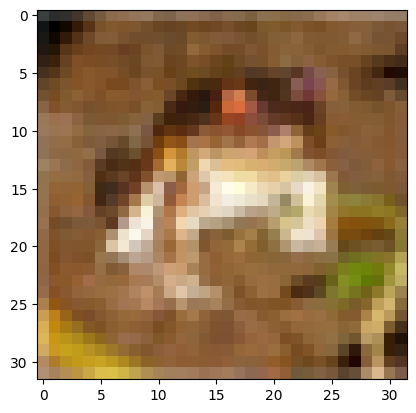

In [5]:
plt.imshow(x_train[0],cmap=cm.CMRmap)
plt.show()

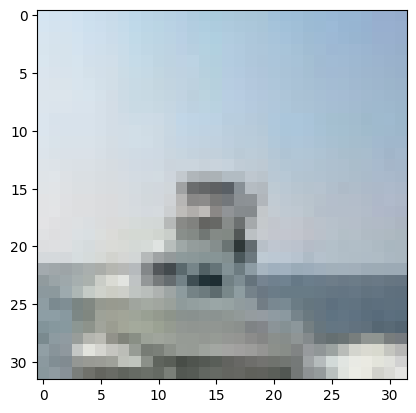

In [6]:
plt.imshow(x_train[100],cmap=cm.CMRmap)
plt.show()

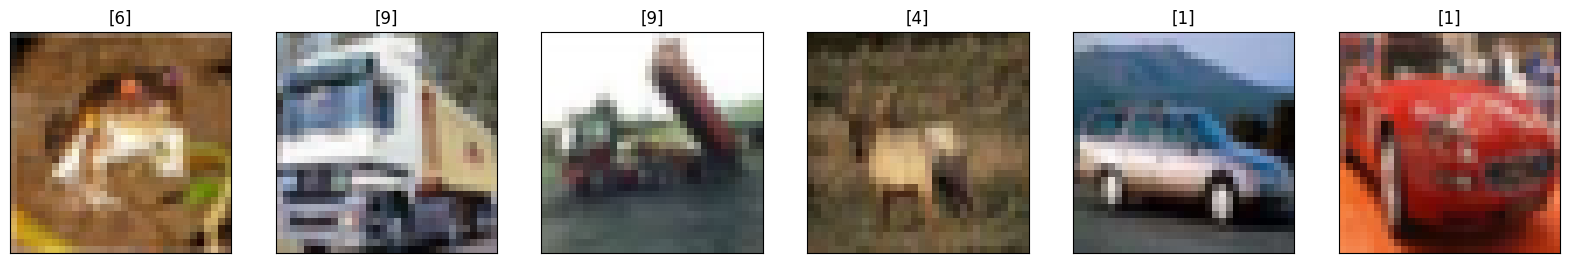

In [7]:
fig=plt.figure(figsize=(20,20))

for i in range(0, 6):
  ax=fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i],cmap='CMRmap')
  ax.set_title(str(y_train[i]))
plt.show()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
x_train[0].max()

np.uint8(255)

In [11]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
x_train[0].min()

np.float32(0.0)

In [14]:
x_train[0].max()

np.float32(1.0)

In [15]:
y_train.ndim

2

In [16]:
y_train.shape

(50000, 1)

In [17]:
len(np.unique(y_train))

10

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_test.shape

(10000, 32, 32, 3)

In [21]:
x_train[0].ndim

3

In [22]:
import numpy as np
from  google.colab.patches import cv2_imshow
import cv2,os,json,random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization

In [23]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [24]:
y_train.shape

(50000, 10)

In [25]:
y_test.shape

(10000, 10)

In [26]:
y_test.ndim

2

In [27]:
model = Sequential([
    Conv2D(64, kernel_size=(2, 2),padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(128, kernel_size=(2, 2),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(256, kernel_size=(2, 2),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop=EarlyStopping(monitor='val_accuracy',patience=5,verbose=1)
checkpoint=ModelCheckpoint('model.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_split=0.3,callbacks=[early_stop,checkpoint])

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.3507 - loss: 1.9768
Epoch 1: val_accuracy improved from -inf to 0.14267, saving model to model.keras
274/274 ━━━━━━━━━━━━━━━━━━━━ 144s 516ms/step - accuracy: 0.3510 - loss: 1.9756 - val_accuracy: 0.1427 - val_loss: 4.6700
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.5442 - loss: 1.2766
Epoch 2: val_accuracy improved from 0.14267 to 0.37493, saving model to model.keras
274/274 ━━━━━━━━━━━━━━━━━━━━ 126s 459ms/step - accuracy: 0.5443 - loss: 1.2765 - val_accuracy: 0.3749 - val_loss: 1.8458
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.6153 - loss: 1.0996
Epoch 3: val_accuracy improved from 0.37493 to 0.55133, saving model to model.keras
274/274 ━━━━━━━━━━━━━━━━━━━━ 131s 480ms/step - accuracy: 0.6153 - loss: 1.0995 - val_accuracy: 0.5513 - val_loss: 1.3151
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6538 - loss: 0.9863
Epoch 4: val_accuracy improved from 

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print('Test Loss:',loss)
print('Test Accuracy:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6616 - loss: 1.1604
Test Loss: 1.1576216220855713
Test Accuracy: 0.6593999862670898


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 256)      │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,526 (1.79 MB)

 Trainable params: 234,314 (915.29 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 234,316 (915.30 KB)

In [ ]:
y_pred=model.predict(x_test)
cifar10_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


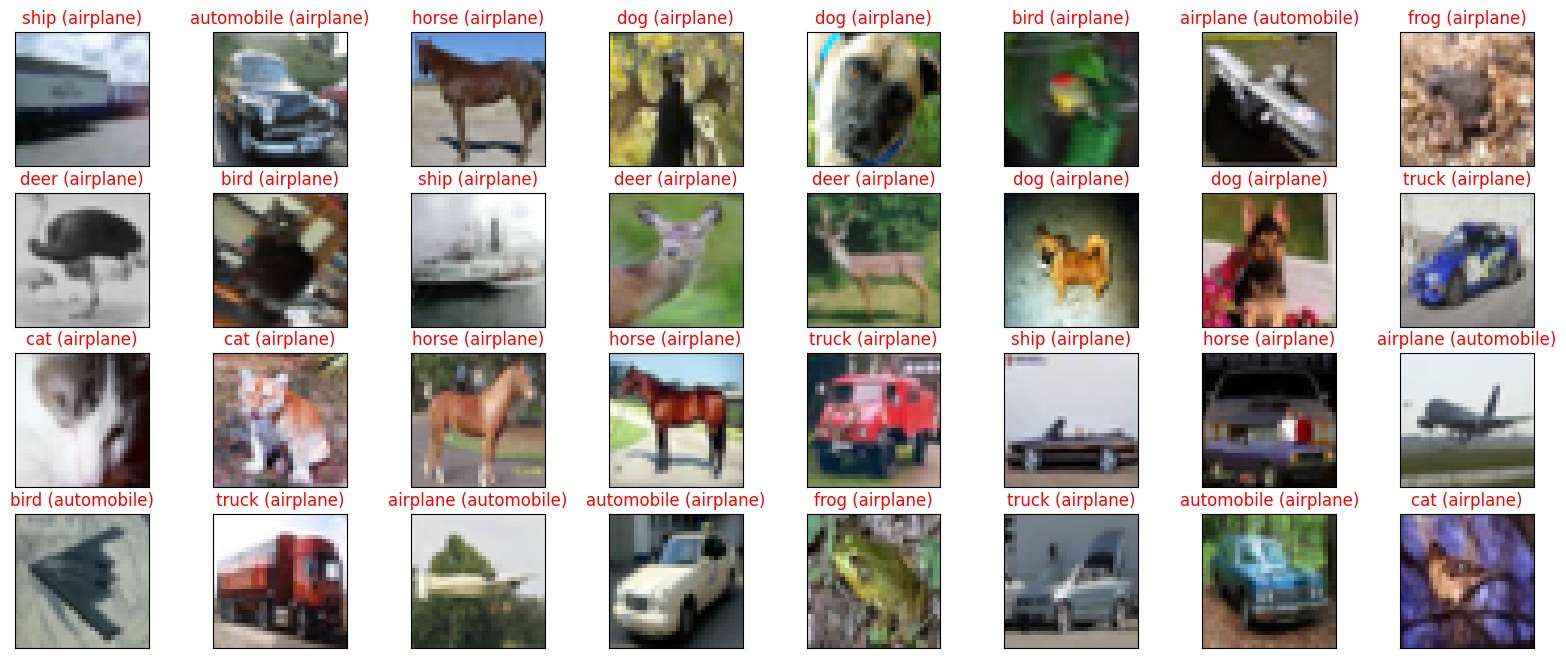

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
  ax= fig.add_subplot(4, 8, i + 1 ,xticks=[], yticks=[])
  ax.imshow(x_test[idx])
  pred_idx= np.argmax(y_pred[idx])
  #true_idx= np.argmax(y_test[idx])
  true_idx=int(y_test[idx][0])
  ax.set_title("{} ({})".format(cifar10_labels [pred_idx], cifar10_labels [true_idx]), color=("blue" if pred_idx== true_idx else "red"))

In [ ]:
cifar10_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**image 1-aeroplane**

In [ ]:
from  google.colab.patches import cv2_imshow
import cv2,os,json,random

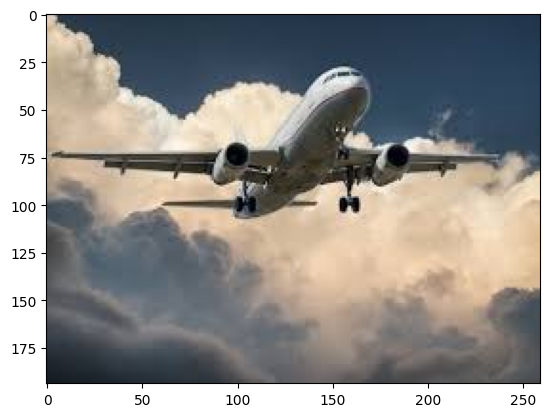

In [ ]:
aer_img =mpimg.imread('/content/aeroplane.jpg')
plt.imshow(aer_img)

In [ ]:
aer_img.shape

(194, 259, 3)

In [ ]:
aer_img.max()

np.uint8(255)

In [ ]:
aer_img=aer_img.astype('float32')/255

In [ ]:
aer_img.shape

(194, 259, 3)

In [ ]:
aer_img.max()

np.float32(1.0)

In [ ]:
aer_img.min()

np.float32(0.0)

In [ ]:
resize_aer=cv2.resize(aer_img,(32,32))
resize_aer.shape

(32, 32, 3)

In [ ]:
pred_aer=model.predict(resize_aer.reshape(1,32,32,3))
pred_aer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[9.9350584e-01, 1.6981259e-05, 2.6232456e-03, 6.6458459e-05,
        9.5063663e-04, 8.4762814e-06, 6.5060198e-07, 1.3879014e-03,
        1.4250550e-03, 1.4624109e-05]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_aer)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: airplane


**image 2- bird**

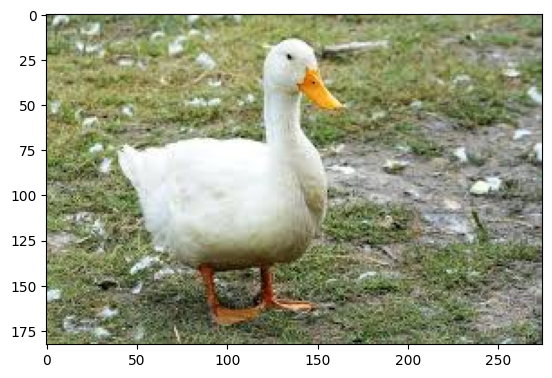

In [ ]:
bir_img=mpimg.imread('/content/bird.jpg')
plt.imshow(bir_img)

In [ ]:
bir_img.shape

(183, 275, 3)

In [ ]:
bir_img.max()

np.uint8(255)

In [ ]:
bir_img=bir_img.astype('float32')/255

In [ ]:
bir_img.max()

np.float32(1.0)

In [ ]:
bir_img.min()

np.float32(0.0)

In [ ]:
resize_bir=cv2.resize(bir_img,(32,32))
resize_bir.shape

(32, 32, 3)

In [ ]:
pred_bir=model.predict(resize_bir.reshape(1,32,32,3))
pred_bir

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[2.5683444e-02, 8.7928413e-05, 4.3488181e-01, 3.8100603e-01,
        9.2519715e-02, 2.0446570e-03, 6.1343446e-02, 1.6265213e-03,
        4.6224298e-04, 3.4424051e-04]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_bir)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: bird


**image - 3 cat**

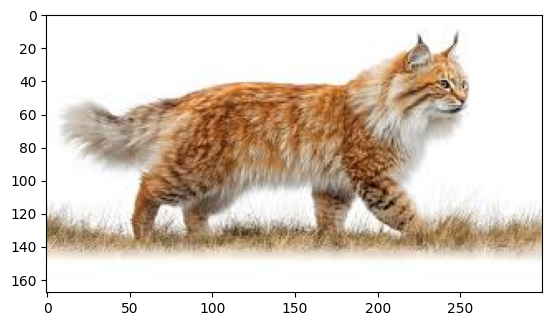

In [ ]:
cat_img=mpimg.imread('/content/cat.jpg')
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(168, 300, 3)

In [ ]:
cat_img.max()

np.uint8(255)

In [ ]:
cat_img=cat_img.astype('float32')/255

In [ ]:
cat_img.max()

np.float32(1.0)

In [ ]:
cat_img.min()

np.float32(0.0)

In [ ]:
resize_cat=cv2.resize(cat_img,(32,32))
resize_cat.shape

(32, 32, 3)

In [ ]:
pred_cat=model.predict(resize_cat.reshape(1,32,32,3))
pred_cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[7.7144620e-03, 4.1363957e-05, 3.0531390e-02, 7.5545812e-01,
        9.8538958e-02, 4.7895961e-02, 1.3210822e-02, 2.6726784e-02,
        2.4479456e-04, 1.9637324e-02]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_cat)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: cat


**image - 4 deer**

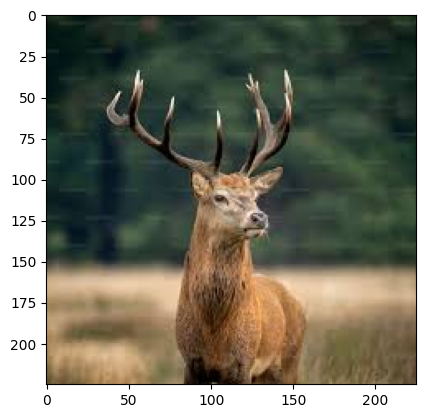

In [ ]:
de_img=mpimg.imread('/content/deer.jpg')
plt.imshow(de_img)

In [ ]:
de_img.shape

(225, 225, 3)

In [ ]:
de_img.max()

np.uint8(255)

In [ ]:
de_img=de_img.astype('float32')/255

In [ ]:
de_img.max()

np.float32(1.0)

In [ ]:
de_img.min()

np.float32(0.0)

In [ ]:
resize_de=cv2.resize(de_img,(32,32))
resize_de.shape

(32, 32, 3)

In [ ]:
pred_de=model.predict(resize_de.reshape(1,32,32,3))
pred_de

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[1.8258148e-09, 6.0832978e-11, 3.8583155e-05, 6.9358407e-07,
        9.9491197e-01, 3.2409600e-05, 2.4333420e-07, 5.0161607e-03,
        7.4591834e-12, 5.9398861e-11]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_de)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: deer


**Image 5- Dog**

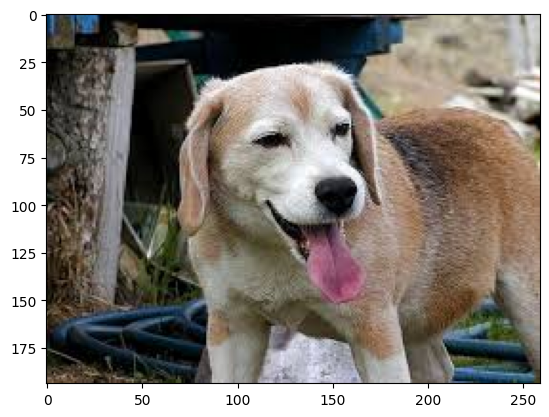

In [ ]:
do_img=mpimg.imread('/content/dog.jpg')
plt.imshow(do_img)

In [ ]:
do_img.shape

(194, 259, 3)

In [ ]:
do_img.max()

np.uint8(255)

In [ ]:
do_img=de_img.astype('float32')/255

In [ ]:
do_img.max()

np.float32(0.003921569)

In [ ]:
do_img.min()

np.float32(0.0)

In [ ]:
resize_do=cv2.resize(do_img,(32,32))
resize_do.shape

(32, 32, 3)

In [ ]:
pred_do=model.predict(resize_do.reshape(1,32,32,3))
pred_do

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[1.5435614e-02, 2.2521506e-04, 1.8218655e-02, 2.5018921e-01,
        3.9267495e-01, 4.4449753e-04, 4.0077601e-02, 3.2536329e-05,
        2.8267944e-01, 2.2315000e-05]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_do)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: deer
